## More predicting

https://pythonprogramming.net/more-predicting-outcomes/

In [1]:
'''
so we suspect that possibly 

To compare patterns:
use a % change calculation to calculate similarity between each %change
movement in the pattern finder. From those numbers, subtract them from 100, to
get a "how similar" #. From this point, take all 10 of the how similars,
and average them. Whichever pattern is MOST similar, is the one we will assume
we have found. 
'''

import time
import zipfile
import shutil
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from functools import reduce
from matplotlib import style
from IPython.display import display
style.use("ggplot")

In [2]:
# unzip data
with zipfile.ZipFile('GBPUSD.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [3]:
df = pd.read_csv('data/GBPUSD1d.txt', header=None, names=['date', 'bid', 'ask'])
df["date"] = pd.to_datetime(df['date'], format='%Y%m%d%H%M%S')

In [4]:
avgLine = ((df.bid+df.ask)/2)

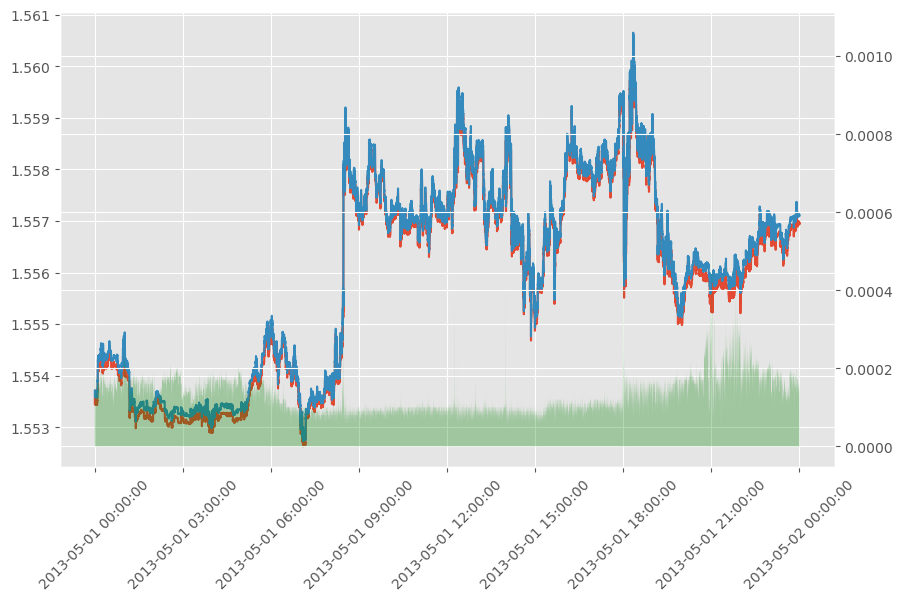

In [5]:
def graphRawFX():
    
    fig=plt.figure(figsize=(10,7))
    ax1 = plt.subplot2grid((40,40), (0,0), rowspan=40, colspan=40)
    ax1.plot(df.date, df.bid)
    ax1.plot(df.date, df.ask)
    
    # ax1.plot(df.date, percentChange(df.ask.iloc[0], df.ask),'r')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

    plt.grid(True)
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

    ax1_2 = ax1.twinx()
    
    ax1_2.fill_between(df.date, 0, (df.ask-df.bid), facecolor='g',alpha=.3)

    plt.subplots_adjust(bottom=.23)

    plt.show()

graphRawFX()

In [6]:
####DEFINE######
#CHANGE#
patternAr = []
performanceAr = []
patForRec = []

In [7]:
def percentChange(startPoint,currentPoint):
    try:
        x = ((float(currentPoint)-startPoint)/abs(startPoint))*100.00
        if x == 0.0:
            return 0.000000001
        else:
            return x
    except:
        return 0.0001

In [8]:
%%time
def patternStorage():
    '''
    The goal of patternFinder is to begin collection of %change patterns
    in the tick data. From there, we also collect the short-term outcome
    of this pattern. Later on, the length of the pattern, how far out we
    look to compare to, and the length of the compared range be changed,
    and even THAT can be machine learned to find the best of all 3 by
    comparing success rates.
    '''
    
    #####
    # required to do a pattern array, because the liklihood of an identical
    # %change across millions of patterns is fairly likely and would
    # cause problems. IF it was a problem of identical patterns,
    # then it wouldnt matter, but the % change issue
    # would cause a lot of harm. Cannot have a list as a dictionary Key.
    
    #MOVE THE ARRAYS THEMSELVES#
    
    #This finds the length of the total array for us
    x = len(avgLine)-30
    #This will be our starting point, allowing us to compare to the
    #past 10 % changes. 
    y = 11
    # where we are in a trade. #
    # can be none, buy,
    currentStance = 'none'
    
    while y < x:
        pattern = []
        p1 = percentChange(avgLine.iloc[y-10], avgLine.iloc[y-9])
        p2 = percentChange(avgLine.iloc[y-10], avgLine.iloc[y-8])
        p3 = percentChange(avgLine.iloc[y-10], avgLine.iloc[y-7])
        p4 = percentChange(avgLine.iloc[y-10], avgLine.iloc[y-6])
        p5 = percentChange(avgLine.iloc[y-10], avgLine.iloc[y-5])
        p6 = percentChange(avgLine.iloc[y-10], avgLine.iloc[y-4])
        p7 = percentChange(avgLine.iloc[y-10], avgLine.iloc[y-3])
        p8 = percentChange(avgLine.iloc[y-10], avgLine.iloc[y-2])
        p9 = percentChange(avgLine.iloc[y-10], avgLine.iloc[y-1])
        p10= percentChange(avgLine.iloc[y-10], avgLine.iloc[y])

        outcomeRange = avgLine.iloc[y+20:y+30]
        currentPoint = avgLine.iloc[y]
        
        #Define##########################
        #########change to try except for safety
        try:
            #function to account for the average of the items in the array
            avgOutcome = reduce(lambda x, y: x + y, outcomeRange) / len(outcomeRange)
        except Exception as e:
            print(str(e))
            avgOutcome = 0
        #Define
        futureOutcome = percentChange(currentPoint, avgOutcome)

        #print some logics
        '''
        print 'where we are historically:',currentPoint
        print 'soft outcome of the horizon:',avgOutcome
        print 'This pattern brings a future change of:',futureOutcome
        print '_______'
        print p1, p2, p3, p4, p5, p6, p7, p8, p9, p10
        '''

        pattern.append(p1)
        pattern.append(p2)
        pattern.append(p3)
        pattern.append(p4)
        pattern.append(p5)
        pattern.append(p6)
        pattern.append(p7)
        pattern.append(p8)
        pattern.append(p9)
        pattern.append(p10)


        #can use .index to find the index value, then search for that value to get the matching information.
        # so like, performanceAr.index(12341)
        patternAr.append(pattern)
        performanceAr.append(futureOutcome)
        
        y+=1
    #####
    print(f'patternAr len: {len(patternAr)}')
    print(f'performanceAr len: {len(performanceAr)}')
    #####

patternStorage()

patternAr len: 61971
performanceAr len: 61971
CPU times: user 3.26 s, sys: 19.3 ms, total: 3.28 s
Wall time: 2.99 s


In [9]:
def currentPattern():
    #mostRecentPoint = avgLine[-1]

    cp1 = percentChange(avgLine.iloc[-11],avgLine.iloc[-10])
    cp2 = percentChange(avgLine.iloc[-11],avgLine.iloc[-9])
    cp3 = percentChange(avgLine.iloc[-11],avgLine.iloc[-8])
    cp4 = percentChange(avgLine.iloc[-11],avgLine.iloc[-7])
    cp5 = percentChange(avgLine.iloc[-11],avgLine.iloc[-6])
    cp6 = percentChange(avgLine.iloc[-11],avgLine.iloc[-5])
    cp7 = percentChange(avgLine.iloc[-11],avgLine.iloc[-4])
    cp8 = percentChange(avgLine.iloc[-11],avgLine.iloc[-3])
    cp9 = percentChange(avgLine.iloc[-11],avgLine.iloc[-2])
    cp10= percentChange(avgLine.iloc[-11],avgLine.iloc[-1])

    patForRec.append(cp1)
    patForRec.append(cp2)
    patForRec.append(cp3)
    patForRec.append(cp4)
    patForRec.append(cp5)
    patForRec.append(cp6)
    patForRec.append(cp7)
    patForRec.append(cp8)
    patForRec.append(cp9)
    patForRec.append(cp10)

    print(patForRec)

currentPattern()

[-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]


(6426)


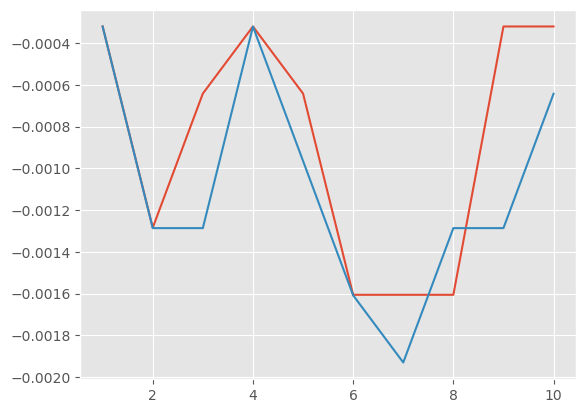

[-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
[-0.000321600282996074, -0.0012864011320271418, -0.0012864011320271418, -0.000321600282996074, -0.0009648008490167858, -0.0016080014150374978, -0.0019296016980335717, -0.0012864011320271418, -0.0012864011320271418, -0.0006432005660207119]
################################################################################
predicted outcome: -0.0013507298765257116
----------------------------------------

(14644)


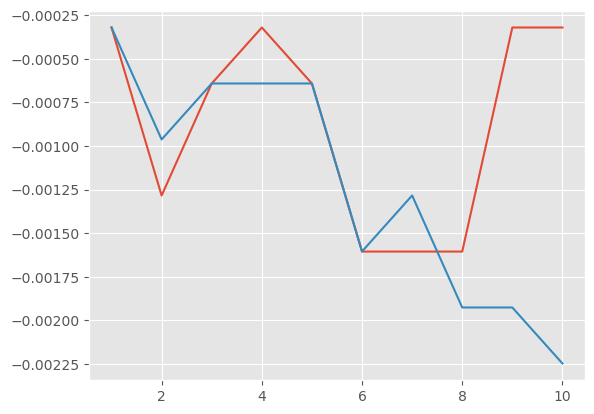

[-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
[-0.0003210262567253853, -0.0009630787702046686, -0.0006420525134792833, -0.0006420525134792833, -0.0006420525134792833, -0.0016051312836839523, -0.0012841050269443103, -0.0019261575404093372, -0.0019261575404093372, -0.0022471837971632354]
################################################################################
predicted outcome: -0.01765684090221983
----------------------------------------

(16623)


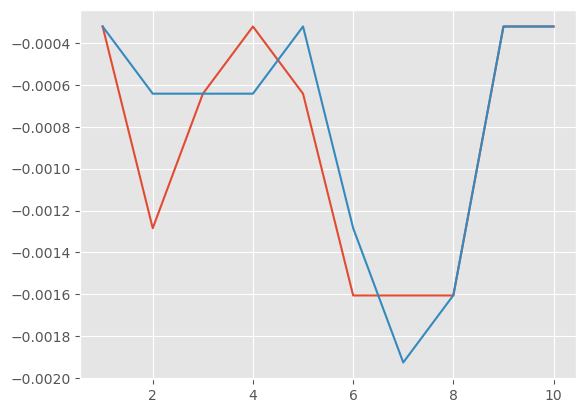

[-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
[-0.00032095001205198107, -0.0006419000240754561, -0.0006419000240754561, -0.0006419000240754561, -0.00032095001205198107, -0.0012838000481509122, -0.0019257000722263681, -0.0016047500601886402, -0.00032095001205198107, -0.00032095001205198107]
################################################################################
predicted outcome: 0.01418603606206081
----------------------------------------

(30509)


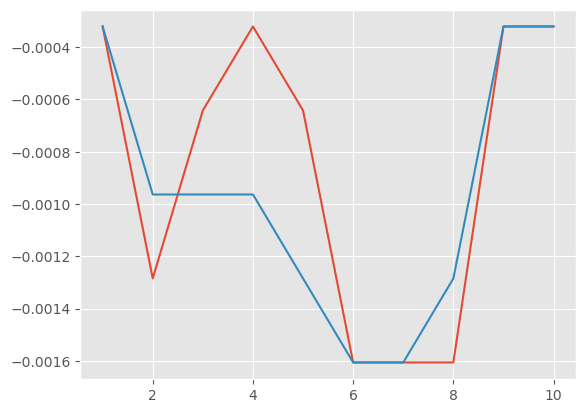

[-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
[-0.0003211510052190121, -0.0009634530156285126, -0.0009634530156285126, -0.0009634530156285126, -0.0012846040208190008, -0.001605755026023751, -0.001605755026023751, -0.0012846040208190008, -0.0003211510052190121, -0.0003211510052190121]
################################################################################
predicted outcome: 0.017920283641501986
----------------------------------------

(41451)


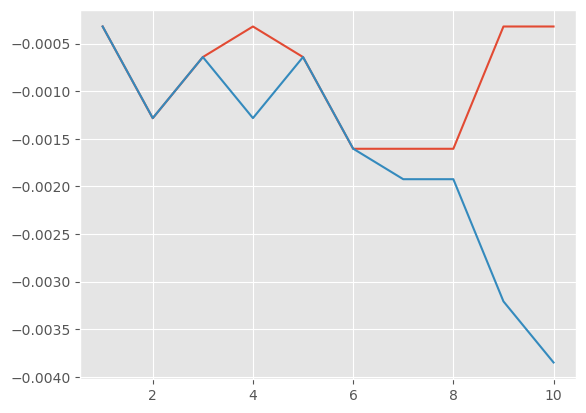

[-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
[-0.00032085836030178654, -0.0012834334411501503, -0.0006417167205750752, -0.0012834334411501503, -0.0006417167205750752, -0.0016042918014376878, -0.0019251501617252255, -0.0019251501617252255, -0.0032085836028753756, -0.003850300323436202]
################################################################################
predicted outcome: -0.00301618471886144
----------------------------------------

(51251)


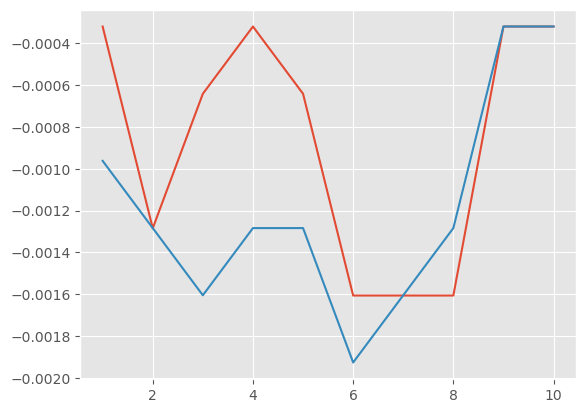

[-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
[-0.0009626801013943602, -0.0012835734685305638, -0.0016044668356667673, -0.0012835734685305638, -0.0012835734685305638, -0.001925360202802971, -0.0016044668356667673, -0.0012835734685305638, -0.00032089336712195306, -0.00032089336712195306]
################################################################################
predicted outcome: -0.008311164878743222
----------------------------------------

(51619)


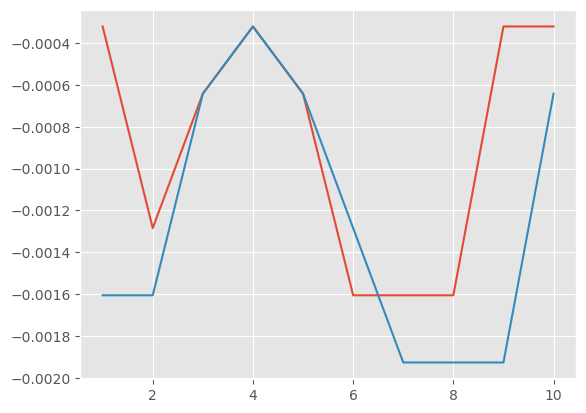

[-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
[-0.0016055797106065712, -0.0016055797106065712, -0.0006422318842483326, -0.0003211159421099059, -0.0006422318842483326, -0.0012844637684966652, -0.0019266956527307375, -0.0019266956527307375, -0.0019266956527307375, -0.0006422318842483326]
################################################################################
predicted outcome: -0.015060434408430974
----------------------------------------

(60785)


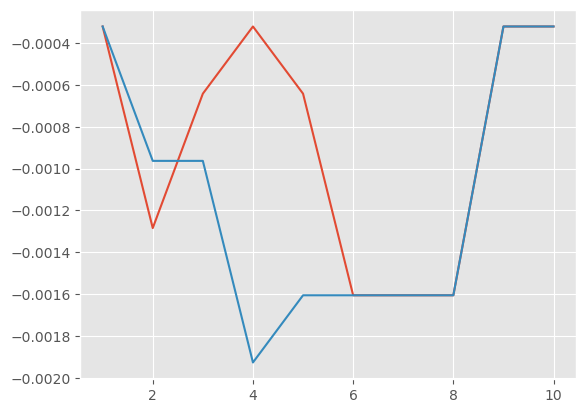

[-0.00032112212917026896, -0.0012844885166668153, -0.0006422442583405379, -0.00032112212917026896, -0.0006422442583405379, -0.001605610645851345, -0.0016056106458370843, -0.0016056106458370843, -0.00032112212917026896, -0.00032112212917026896]
[-0.000321132441429342, -0.0009633973243165482, -0.0009633973243165482, -0.0019267946486330964, -0.0016056622072037545, -0.0016056622072037545, -0.0016056622072037545, -0.0016056622072037545, -0.000321132441429342, -0.000321132441429342]
################################################################################
predicted outcome: -0.02386021702201313
----------------------------------------

CPU times: user 1.56 s, sys: 29.9 ms, total: 1.59 s
Wall time: 547 ms


In [10]:
%%time
def patternRecognition():
    for eachPattern in patternAr:
        sim1 = 100.00 - abs(percentChange(eachPattern[0], patForRec[0]))
        sim2 = 100.00 - abs(percentChange(eachPattern[1], patForRec[1]))
        sim3 = 100.00 - abs(percentChange(eachPattern[2], patForRec[2]))
        sim4 = 100.00 - abs(percentChange(eachPattern[3], patForRec[3]))
        sim5 = 100.00 - abs(percentChange(eachPattern[4], patForRec[4]))
        sim6 = 100.00 - abs(percentChange(eachPattern[5], patForRec[5]))
        sim7 = 100.00 - abs(percentChange(eachPattern[6], patForRec[6]))
        sim8 = 100.00 - abs(percentChange(eachPattern[7], patForRec[7]))
        sim9 = 100.00 - abs(percentChange(eachPattern[8], patForRec[8]))
        sim10 = 100.00 - abs(percentChange(eachPattern[9], patForRec[9]))
        howSim = (sim1+sim2+sim3+sim4+sim5+sim6+sim7+sim8+sim9+sim10)/10.00

        if howSim > 70:
            patdex = patternAr.index(eachPattern)
            print(f'({patdex})')
            
            xp = [1,2,3,4,5,6,7,8,9,10]
            fig = plt.figure()
            plt.plot(xp, patForRec)
            plt.plot(xp, eachPattern)
            plt.show()
            
            print(patForRec)
            print('=' * 80)
            print(eachPattern)
            print('#' * 80)
            print(f'predicted outcome: {performanceAr[patdex]}')
            print('-' * 40)
            print()

patternRecognition()

### Optimize with Vectorized Operations:

In [11]:
def percentChange2(startPoint, currentPoint):
    change = np.where(startPoint != 0, ((currentPoint - startPoint) / abs(startPoint)) * 100.00, 0.0001)
    change = np.where(change != 0, change, 0.000000001)
    return pd.Series(change, index=startPoint.index)

In [12]:
%%time
def patternStorage2() -> pd.DataFrame:
    '''
    The goal of patternFinder is to begin collection of %change patterns
    in the tick data. From there, we also collect the short-term outcome
    of this pattern. Later on, the length of the pattern, how far out we
    look to compare to, and the length of the compared range be changed,
    and even THAT can be machine learned to find the best of all 3 by
    comparing success rates.
    '''
    
    #Simple Average
    avgData = pd.DataFrame(avgLine, columns=['current'])
    
    # prepare prev 1~10 days price for calculating percent change
    avgData['prev10'] = avgData['current'].shift(10)
    avgData['prev9'] = avgData['current'].shift(9)
    avgData['prev8'] = avgData['current'].shift(8)
    avgData['prev7'] = avgData['current'].shift(7)
    avgData['prev6'] = avgData['current'].shift(6)
    avgData['prev5'] = avgData['current'].shift(5)
    avgData['prev4'] = avgData['current'].shift(4)
    avgData['prev3'] = avgData['current'].shift(3)
    avgData['prev2'] = avgData['current'].shift(2)
    avgData['prev1'] = avgData['current'].shift(1)
    
    #This finds the length of the total array for us
    x = len(avgData)-30
    #This will be our starting point, allowing us to compare to the
    #past 10 % changes. 
    y = 11
    # where we are in a trade. #
    # can be none, buy,
    currentStance = 'none'
    
    patterns = pd.DataFrame(avgData['current'])
    
    #function to account for the average of the items in the array
    avgOutcome = patterns['current'].rolling(window=10).mean().shift(-(40-y))
    patterns['predicted'] = percentChange2(patterns['current'], avgOutcome)
    
    patterns['p1'] = percentChange2(avgData['prev10'], avgData['prev9'])
    patterns['p2'] = percentChange2(avgData['prev10'], avgData['prev8'])
    patterns['p3'] = percentChange2(avgData['prev10'], avgData['prev7'])
    patterns['p4'] = percentChange2(avgData['prev10'], avgData['prev6'])
    patterns['p5'] = percentChange2(avgData['prev10'], avgData['prev5'])
    patterns['p6'] = percentChange2(avgData['prev10'], avgData['prev4'])
    patterns['p7'] = percentChange2(avgData['prev10'], avgData['prev3'])
    patterns['p8'] = percentChange2(avgData['prev10'], avgData['prev2'])
    patterns['p9'] = percentChange2(avgData['prev10'], avgData['prev1'])
    patterns['p10'] = percentChange2(avgData['prev10'], avgData['current'])
    
    patterns = patterns.iloc[11:-30].copy()
    patterns.reset_index(inplace=True, drop=True)
    
    return patterns
    
patterns = patternStorage2()
patterns

CPU times: user 28.1 ms, sys: 4.54 ms, total: 32.6 ms
Wall time: 13.4 ms


,current,predicted,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
0,1.553555,0.002961,-1.930962e-03,-0.003218,-0.003218,-0.003540,-3.861923e-03,-5.471058e-03,-6.114712e-03,-4.505577e-03,-4.505577e-03,-4.827404e-03
1,1.553555,0.002446,-1.287333e-03,-0.001287,-0.001609,-0.001931,-3.540165e-03,-4.183831e-03,-2.574665e-03,-2.574665e-03,-2.896498e-03,-2.896498e-03
2,1.553530,0.003476,1.000000e-09,-0.000322,-0.000644,-0.002253,-2.896536e-03,-1.287349e-03,-1.287349e-03,-1.609187e-03,-1.609187e-03,-3.218373e-03
3,1.553530,0.002671,-3.218373e-04,-0.000644,-0.002253,-0.002897,-1.287349e-03,-1.287349e-03,-1.609187e-03,-1.609187e-03,-3.218373e-03,-3.218373e-03
4,1.553540,0.001480,-3.218383e-04,-0.001931,-0.002575,-0.000966,-9.655150e-04,-1.287353e-03,-1.287353e-03,-2.896545e-03,-2.896545e-03,-2.252868e-03
...,...,...,...,...,...,...,...,...,...,...,...,...
61966,1.557045,-0.000417,6.422422e-04,0.000321,0.000321,-0.000321,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,3.211211e-04,1.000000e-09
61967,1.557045,-0.000674,-3.211190e-04,-0.000321,-0.000963,-0.000642,-6.422381e-04,-6.422381e-04,-6.422381e-04,-3.211190e-04,-6.422381e-04,-6.422381e-04
61968,1.557050,-0.001220,1.000000e-09,-0.000642,-0.000321,-0.000321,-3.211201e-04,-3.211201e-04,-1.426060e-14,-3.211201e-04,-3.211201e-04,-1.426060e-14
61969,1.557050,-0.001445,-6.422401e-04,-0.000321,-0.000321,-0.000321,-3.211201e-04,-1.426060e-14,-3.211201e-04,-3.211201e-04,-1.426060e-14,-1.426060e-14


In [13]:
%%time
def patternRecognition2() -> pd.DataFrame:
    recognitions = patterns.copy()
    
    sim1 = 100.00 - abs(percentChange2(recognitions.p1, patForRec[0]))
    sim2 = 100.00 - abs(percentChange2(recognitions.p2, patForRec[1]))
    sim3 = 100.00 - abs(percentChange2(recognitions.p3, patForRec[2]))
    sim4 = 100.00 - abs(percentChange2(recognitions.p4, patForRec[3]))
    sim5 = 100.00 - abs(percentChange2(recognitions.p5, patForRec[4]))
    sim6 = 100.00 - abs(percentChange2(recognitions.p6, patForRec[5]))
    sim7 = 100.00 - abs(percentChange2(recognitions.p7, patForRec[6]))
    sim8 = 100.00 - abs(percentChange2(recognitions.p8, patForRec[7]))
    sim9 = 100.00 - abs(percentChange2(recognitions.p9, patForRec[8]))
    sim10 = 100.00 - abs(percentChange2(recognitions.p10, patForRec[9]))
    
    recognitions['score'] = (sim1+sim2+sim3+sim4+sim5+sim6+sim7+sim8+sim9+sim10)/10.00
    
    return recognitions[recognitions['score'] > 70].copy()

recognitions = patternRecognition2()
recognitions

CPU times: user 19.9 ms, sys: 3.34 ms, total: 23.3 ms
Wall time: 8.76 ms


,current,predicted,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,score
6426,1.554715,-0.001351,-0.000322,-0.001286,-0.001286,-0.000322,-0.000965,-0.001608,-0.001930,-0.001286,-0.001286,-0.000643,74.918226
14644,1.557470,-0.017657,-0.000321,-0.000963,-0.000642,-0.000642,-0.000642,-0.001605,-0.001284,-0.001926,-0.001926,-0.002247,70.580484
16623,1.557870,0.014186,-0.000321,-0.000642,-0.000642,-0.000642,-0.000321,-0.001284,-0.001926,-0.001605,-0.000321,-0.000321,70.785516
30509,1.556895,0.017920,-0.000321,-0.000963,-0.000963,-0.000963,-0.001285,-0.001606,-0.001606,-0.001285,-0.000321,-0.000321,79.163145
41451,1.558260,-0.003016,-0.000321,-0.001283,-0.000642,-0.001283,-0.000642,-0.001604,-0.001925,-0.001925,-0.003209,-0.003850,70.976160
51251,1.558145,-0.008311,-0.000963,-0.001284,-0.001604,-0.001284,-0.001284,-0.001925,-0.001604,-0.001284,-0.000321,-0.000321,70.645755
51619,1.557060,-0.015060,-0.001606,-0.001606,-0.000642,-0.000321,-0.000642,-0.001284,-0.001927,-0.001927,-0.001927,-0.000642,70.833157
60785,1.556985,-0.023860,-0.000321,-0.000963,-0.000963,-0.001927,-0.001606,-0.001606,-0.001606,-0.001606,-0.000321,-0.000321,78.998105


(6426)


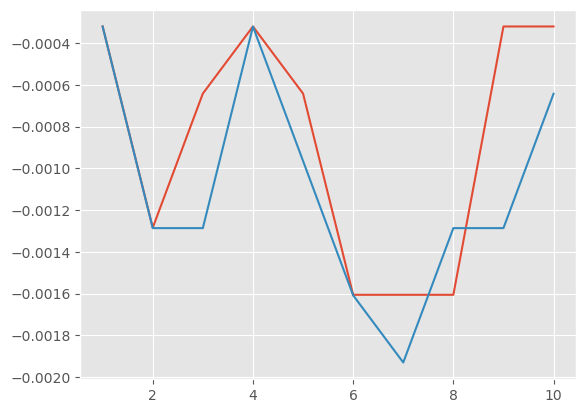

(14644)


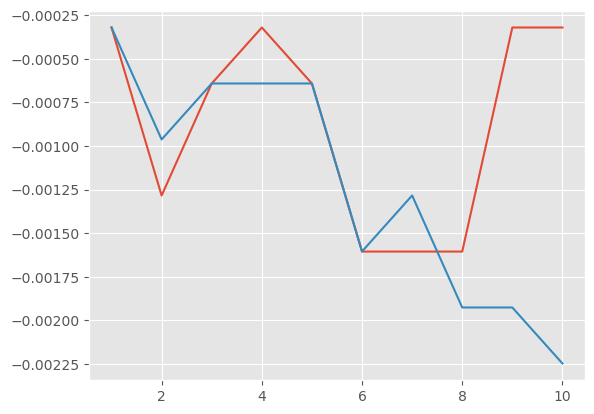

(16623)


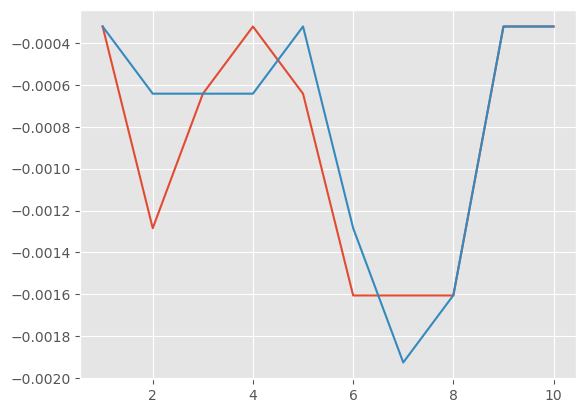

(30509)


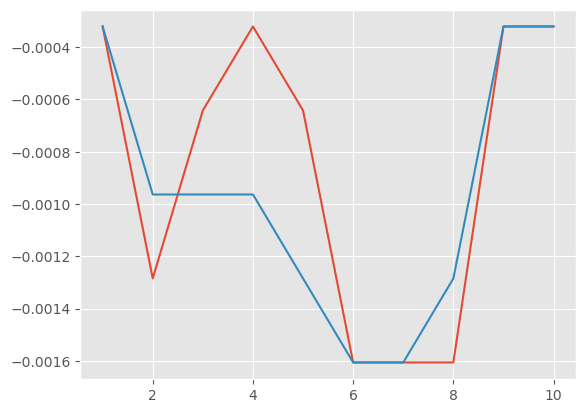

(41451)


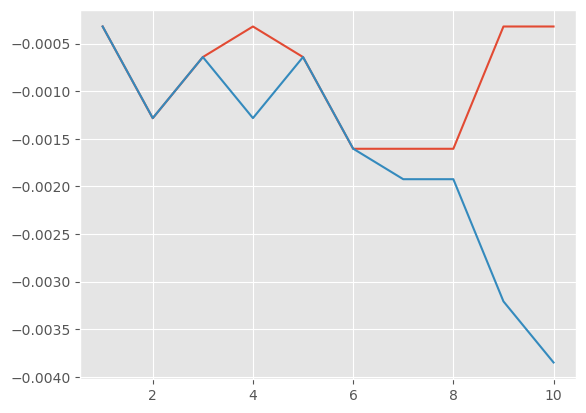

(51251)


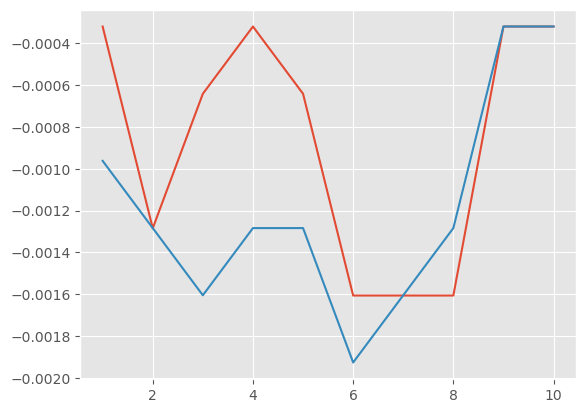

(51619)


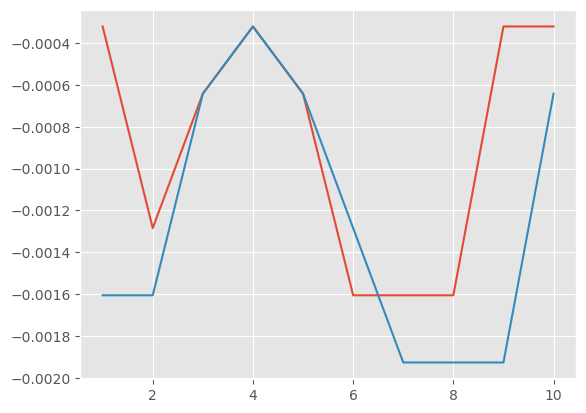

(60785)


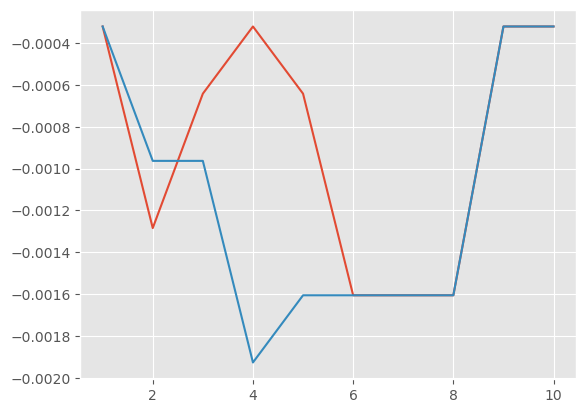

In [14]:
for idx, row in recognitions.iterrows():
    print(f"({idx})")
    pattern = row[['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10']]
    xp = [1,2,3,4,5,6,7,8,9,10]
    fig = plt.figure()
    plt.plot(xp, patForRec)
    plt.plot(xp, pattern)
    plt.show()

In [15]:
# remove extracted data
shutil.rmtree('data')